In [ ]:
#The most useful libraries are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import scipy as sp
import sklearn
import IPython

In [ ]:
#The next thing we should do is check the version we are using
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
import matplotlib
print("Matplotlib version: {}".format(matplotlib.__version__))
print("Python version: {}".format(sys.version))
print("Scipy version: {}".format(sp.__version__))
print("Scikitlearn version: {}".format(sklearn.__version__))
print("IPython version: {}".format(IPython.__version__))

Numpy version: 1.21.6
Pandas version: 1.3.5
Matplotlib version: 3.2.2
Python version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Scipy version: 1.4.1
Scikitlearn version: 1.0.2
IPython version: 5.5.0


Our goal is to build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new iris. 

Because we have measurements for which we know the correct species of iris, this is a supervised learning problem.

This is an example of a classiication problem. The possible outputs (different species of irises) are called classes. Every iris in the dataset belongs to one of three classes, so this problem is a three-class classification problem.

The desired output for a single data point (an iris) is the species of this flower. For a particular data point, the species it belongs to is called its label.

**A First Application: Classifying Iris Species**

In [ ]:
#There are 7 datasets present in the datasets module of sklearn. 
#Iris dataset is one of them 
from sklearn import datasets
iris_data = datasets.load_iris()

In [ ]:
#The iris object that is returned by load_iris is a Bunch object, 
#which is very similar to a dictionary. 
#It contains keys and values
print("Keys of iris_dataset : \n{}".format(iris_data.keys()))

Keys of iris_dataset : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print("DESCR of iris_dataset :\n{}".format(iris_data['DESCR']))

DESCR of iris_dataset :
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== =

In [ ]:
print("feature_names of iris_dataset :\n{}".format(iris_data['feature_names']))
print("----------------------------------------------------------")
print("target_names of iris_dataset :\n{}".format(iris_data['target_names']))
print("----------------------------------------------------------")
print("filename of iris_dataset :\n{}".format(iris_data['filename']))
print("----------------------------------------------------------")
print("data_module of iris_dataset :\n{}".format(iris_data['data_module']))

feature_names of iris_dataset :
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
----------------------------------------------------------
target_names of iris_dataset :
['setosa' 'versicolor' 'virginica']
----------------------------------------------------------
filename of iris_dataset :
iris.csv
----------------------------------------------------------
data_module of iris_dataset :
sklearn.datasets.data


In [ ]:
#The data itself is contained in the target and data fields.
print('Type of data : \n{}'.format(type(iris_data['data'])))

Type of data : 
<class 'numpy.ndarray'>


In [ ]:
print('Shape of data :\n{}'.format(iris_data['data'].shape))

Shape of data :
(150, 4)


In [ ]:
#No. of instances = no. of rows = no. of samples
#No. of attributes = no. of columns = no. of features
print('First five samples of the dataset :\n{}'.format(iris_data['data'][0:5]))

First five samples of the dataset :
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print('Shape of target :\n{}'.format(iris_data['target'].shape))
print('---------------------------------------------------')
print('Type of target : \n{}'.format(type(iris_data['target'])))

Shape of target :
(150,)
---------------------------------------------------
Type of target : 
<class 'numpy.ndarray'>


In [ ]:
print('Target of dataset : \n{}'.format(iris_data['target']))

Target of dataset : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 0 = 'setosa ; 1 = 'versicolor' ; 2 = 'virginica'

**Measuring success : Training and Testing data**

One part of the data is used to build our machine learning model, and is called the training data or training set. The rest of the data will be used to assess how well the model works; this is called the test data, test set, or hold-out set.

scikit-learn contains a function that shuffles the dataset and splits it for you: the train_test_split function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set.



In [ ]:
#Data = X   ; Labels = y
#This is because f(x) = y
#We use capital X because data is a matrix, while the output label, y is a vector
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    iris_data['data'],iris_data['target'],random_state=0)
#To make sure that we will get the same output if we run the same function several
#times, we provide the pseudorandom number generator with a fixed seed using the
#random_state parameter. 

In [ ]:
print('Shape of training data :{}'.format(X_train.shape))
print('Shape of training labels :{}'.format(y_train.shape))

Shape of training data :(112, 4)
Shape of training labels :(112,)


**Look at your data**

One of the best ways to inspect data is to visualize it. One way to do this is by using a scatter plot.

One way is to do a pair plot, which looks at all possible pairs of features. If you have a small number of features, this is quite reasonable.

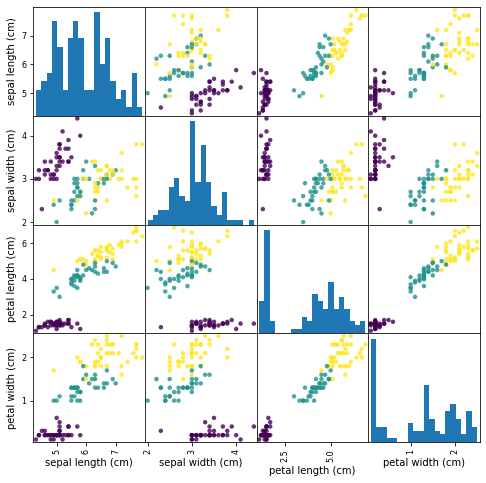

In [ ]:
#To create the plot, we first convert the NumPy array into a pandas DataFrame. 
#pandas has a function to create pair plots called scatter_matrix. 
#The diagonal of this matrix is filled with histograms of each feature
iris_dataframe=pd.DataFrame(X_train,columns=iris_data['feature_names'])
grp=pd.plotting.scatter_matrix(iris_dataframe,c=y_train,figsize=(8,8),marker='o',
                      hist_kwds={'bins':20},s=20,alpha=0.8)


**Building your first model : k-Nearest Neighbours**

 To make a prediction for a new data point, the algorithm
finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.

The k in k-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training set.

All machine learning models in scikit-learn are implemented in their own classes, which are called Estimator classes.

Before we can use the model, we need to instantiate the class into an object.

In [ ]:
#The k-nearest neighbors classification algorithm is implemented in the 
#KNeighborsClassifier class in neighbors module
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

**Evaluating the Model**

In [ ]:
#Here we use the test data
#There are two ways to test the accuracy of our model

#Method: 1
y_pred=knn.predict(X_test)
print('Test predictions: \n{}'.format(y_pred))
print('The accuracy of the model is : \n{:.2f}'.format(np.mean(y_pred==y_test)))
#It prints the score

Test predictions: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
The accuracy of the model is : 
0.97


In [ ]:
#Method: 2
print('Test score predictions : \n{:.2f}'.format(knn.score(X_test,y_test)))


Test score predictions : 
0.97


In [ ]:
#Predicting output for new data

X_new=[[5,2.1,1,0.2]]
prediction=knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name :{}'.format(iris_data['target_names'][prediction]))

Prediction: [0]
Predicted target name :['setosa']
